<a href="https://colab.research.google.com/github/KennyOlat/kennyOlat/blob/main/Hypertension_Prediction_Investigating_Bias_Ethics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WORK FLOW**

the flow of the projects includes:

Data Acquisition -> Data Preprocessing -> Model Building -> Investigating Bias

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import svm, metrics

In [3]:
# loading dataset into panda dataframe
hyper = pd.read_csv("hypertension_data.csv")

In [4]:
#viewing the dataset
hyper.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#checking for the shape of the dataset
hyper.shape

(26083, 14)

In [6]:
#using describe to check for the dataset statistics
hyper.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26083.000000,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253
std,15.189768,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#checking the data types of the dataset
hyper.dtypes

age         float64
sex         float64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
#checking whether the dataset information
hyper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [9]:
hyper.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

only sex has a missing values

In [10]:
#checking the sex values distribution
hyper['sex'].value_counts()

1.0    13029
0.0    13029
Name: sex, dtype: int64

the distribution of sex is the same

In [11]:
#Replace null values
hyper["sex"].fillna(value=hyper['sex'].mean(),inplace=True)

In [12]:
#checking the null value again
hyper.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
#checking the target values distribution
hyper['target'].value_counts()

1    14274
0    11809
Name: target, dtype: int64

target shows 11809 people does not have hypertension while 14274 have

In [14]:
#grouping the outcome by mean value
hyper.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.054619,0.5,0.470235,134.464730,250.908460,0.162927,0.447879,139.124397,0.552460,1.600745,1.163181,1.173342,2.556694
1,55.336066,0.5,1.362617,129.217178,242.388819,0.138854,0.591565,158.367101,0.139695,0.575200,1.596469,0.348326,2.121900


**Data Visualization**

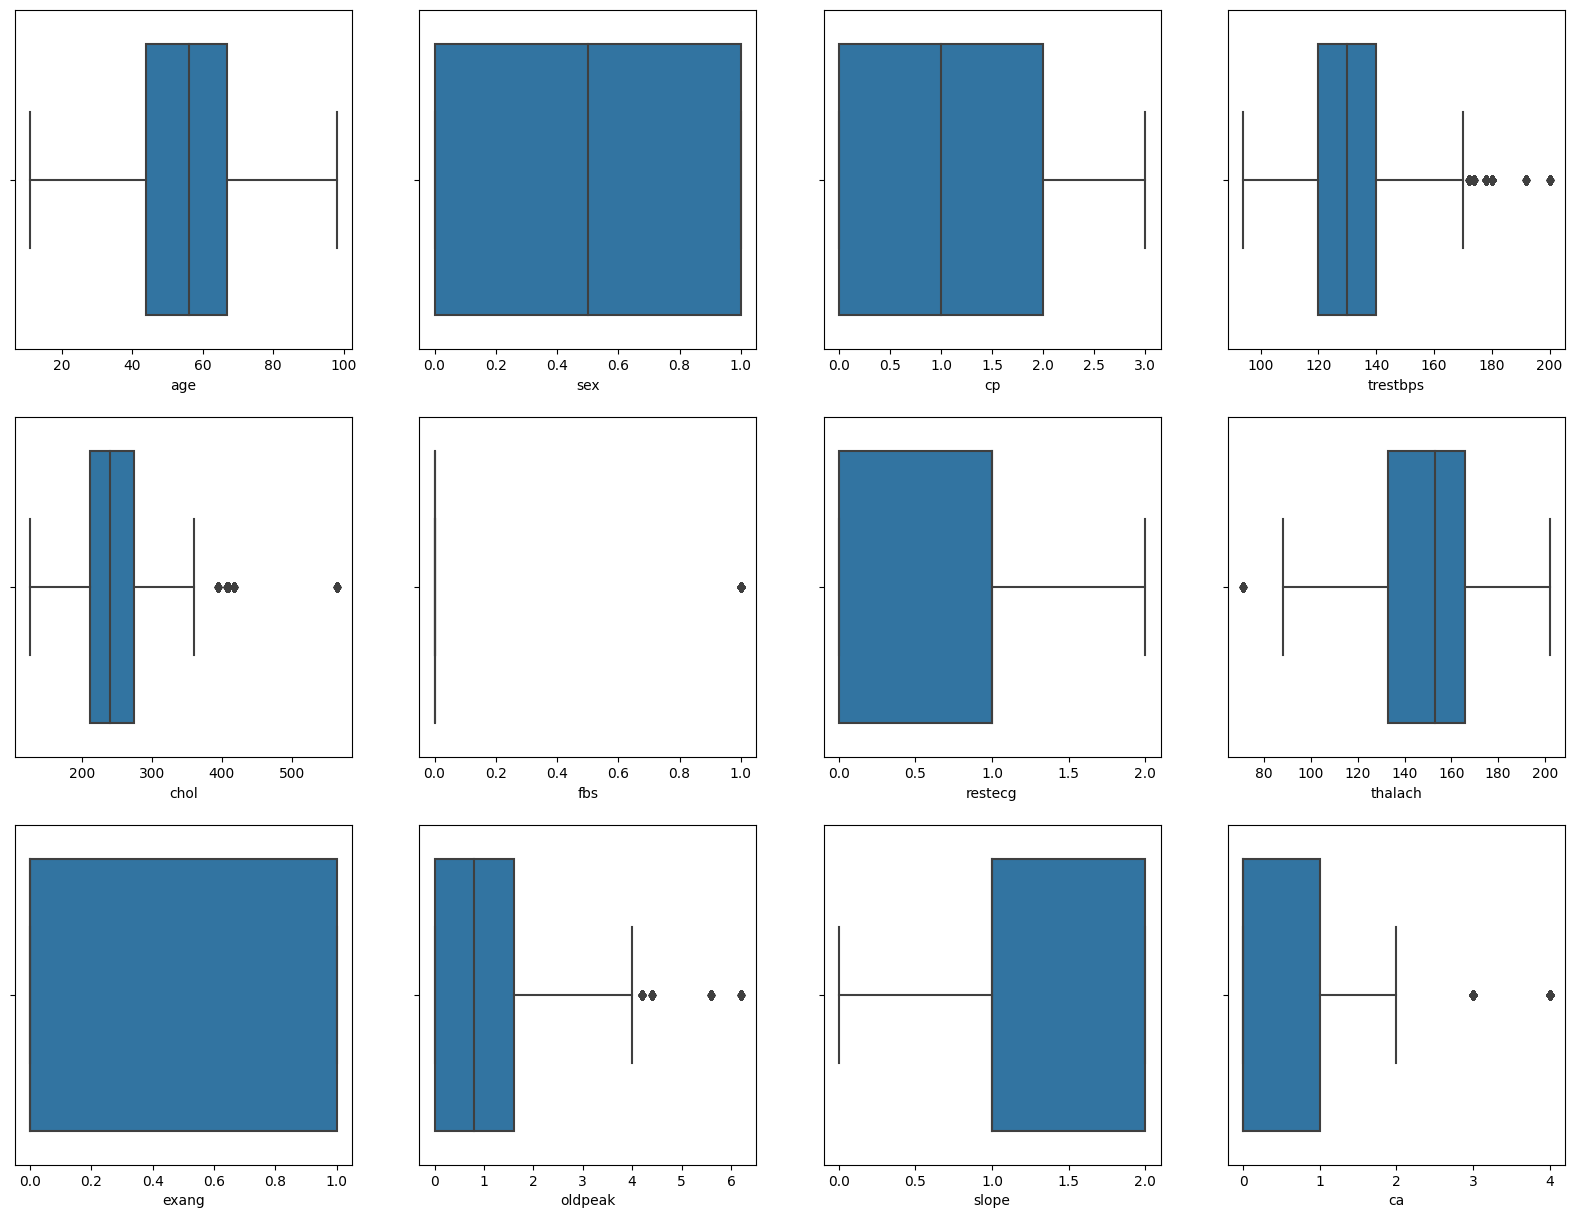

In [15]:
#using seaborn to visualize the dataset to explore whether their is outliers
plt.figure(figsize=(20,15))

plt.subplot(3,4,1)
ax = sns.boxplot(data = hyper, x = 'age')

plt.subplot(3,4,2)
ax = sns.boxplot(data = hyper, x = 'sex')

plt.subplot(3,4,3)
ax = sns.boxplot(data = hyper, x = 'cp')

plt.subplot(3,4,4)
ax = sns.boxplot(data = hyper, x = 'trestbps')

plt.subplot(3,4,5)
ax = sns.boxplot(data = hyper, x = 'chol')

plt.subplot(3,4,6)
ax = sns.boxplot(data = hyper, x = 'fbs')

plt.subplot(3,4,7)
ax = sns.boxplot(data = hyper, x = 'restecg')

plt.subplot(3,4,8)
ax = sns.boxplot(data = hyper, x = 'thalach')

plt.subplot(3,4,9)
ax = sns.boxplot(data = hyper, x = 'exang')

plt.subplot(3,4,10)
ax = sns.boxplot(data = hyper, x = 'oldpeak')

plt.subplot(3,4,11)
ax = sns.boxplot(data = hyper, x = 'slope')

plt.subplot(3,4,12)
ax = sns.boxplot(data = hyper, x = 'ca')




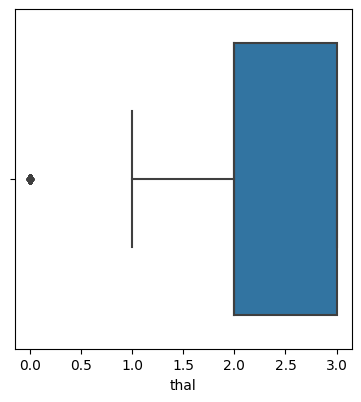

In [16]:
plt.figure(figsize=(20,15))

plt.subplot(3,4,1)
ax = sns.boxplot(data = hyper, x = 'thal')

In [17]:
# using the clipping method to deal with the ourliers
hyper["trestbps"] = hyper["trestbps"].clip(lower=hyper["trestbps"].quantile(0.05), upper=hyper["trestbps"].quantile(0.95))
hyper["chol"] = hyper["chol"].clip(lower=hyper["chol"].quantile(0.05), upper=hyper["chol"].quantile(0.95))
hyper["fbs"] = hyper["fbs"].clip(lower=hyper["fbs"].quantile(0.05), upper=hyper["fbs"].quantile(0.95))
hyper["thalach"] = hyper["thalach"].clip(lower=hyper["thalach"].quantile(0.05), upper=hyper["thalach"].quantile(0.95))
hyper["oldpeak"] = hyper["oldpeak"].clip(lower=hyper["oldpeak"].quantile(0.05), upper=hyper["oldpeak"].quantile(0.95))
hyper["ca"] = hyper["ca"].clip(lower=hyper["ca"].quantile(0.10), upper=hyper["ca"].quantile(0.90))
hyper["thal"] = hyper["thal"].clip(lower=hyper["thal"].quantile(0.05), upper=hyper["thal"].quantile(0.95))

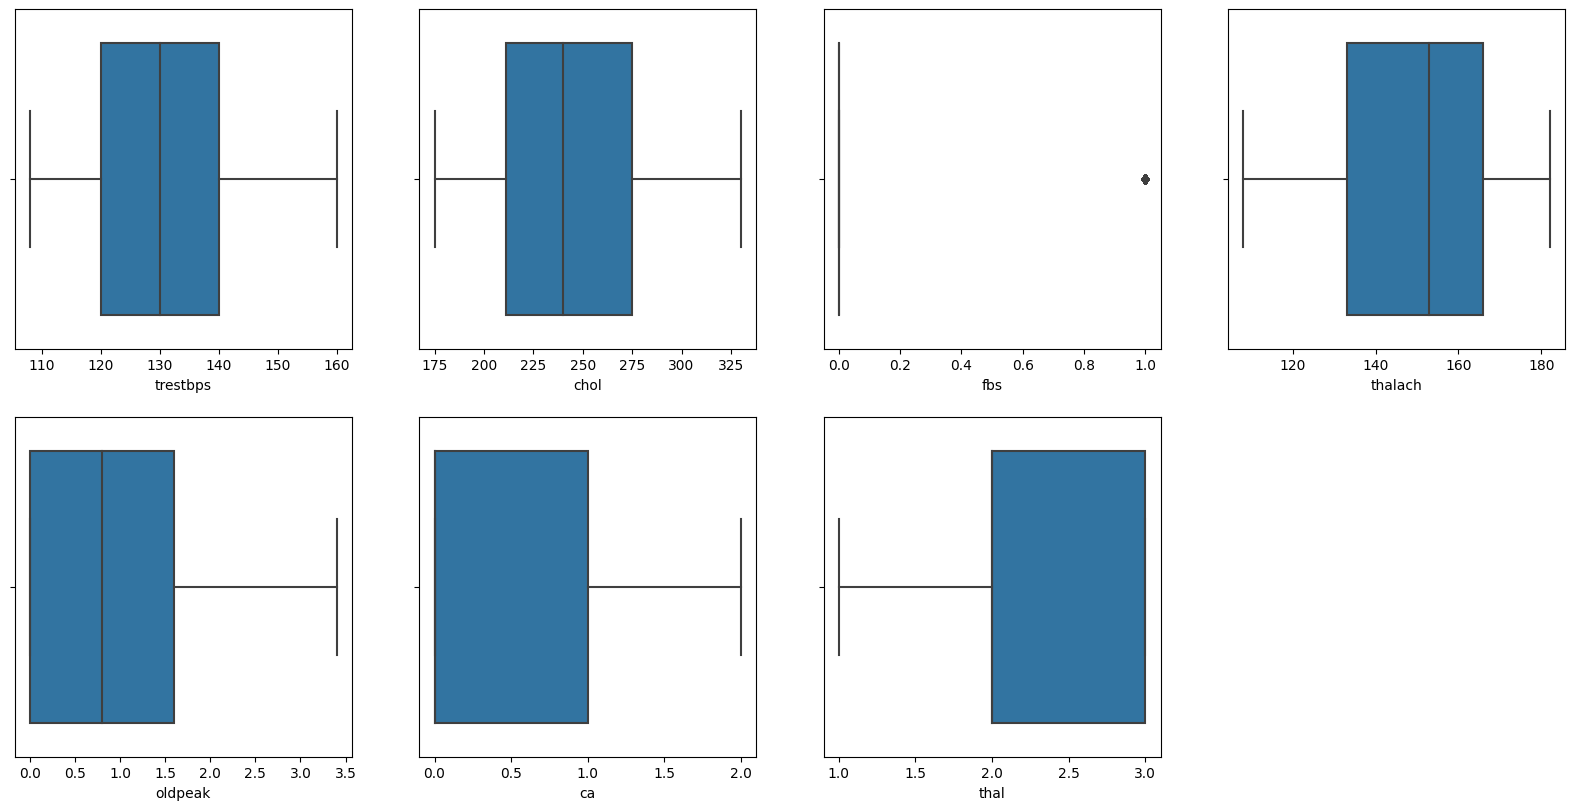

In [18]:
#cheking the outliers again
plt.figure(figsize=(20,15))

plt.subplot(3,4,1)
ax = sns.boxplot(data = hyper, x = 'trestbps')

plt.subplot(3,4,2)
ax = sns.boxplot(data = hyper, x = 'chol')

plt.subplot(3,4,3)
ax = sns.boxplot(data = hyper, x = 'fbs')

plt.subplot(3,4,4)
ax = sns.boxplot(data = hyper, x = 'thalach')

plt.subplot(3,4,5)
ax = sns.boxplot(data = hyper, x = 'oldpeak')

plt.subplot(3,4,6)
ax = sns.boxplot(data = hyper, x = 'ca')

plt.subplot(3,4,7)
ax = sns.boxplot(data = hyper, x = 'thal')


it can been seen that the outliers have been removed

In [19]:
# let's check for the correlation of the dataset
hyper.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-9.870524e-02,1.383668e-03,2.363213e-02,1.782925e-02,-6.637741e-03,-6.880492e-03,-4.845847e-02,1.178333e-02,1.043535e-02,-8.923474e-03,5.318889e-02,6.348395e-03,-2.354715e-02
sex,-0.098705,1.000000e+00,-6.985038e-17,1.648461e-15,1.188405e-15,-5.844877e-18,1.365311e-16,1.738986e-15,-1.721181e-16,5.007673e-16,1.060105e-15,3.919090e-16,1.528033e-15,-2.568324e-16
cp,0.001384,-6.985038e-17,1.000000e+00,5.667110e-02,-9.094112e-02,8.853705e-02,4.862796e-02,2.945050e-01,-3.929385e-01,-1.480978e-01,1.229492e-01,-2.246898e-01,-1.740966e-01,4.338210e-01
trestbps,0.023632,1.648461e-15,5.667110e-02,1.000000e+00,1.348268e-01,1.557301e-01,-1.162478e-01,-6.043967e-02,5.319996e-02,1.762980e-01,-1.094389e-01,1.034971e-01,4.216085e-02,-1.282024e-01
chol,0.017829,1.188405e-15,-9.094112e-02,1.348268e-01,1.000000e+00,8.135868e-03,-1.329058e-01,-2.219720e-02,8.534216e-02,4.072670e-02,1.658624e-02,1.182478e-01,7.343660e-02,-1.089486e-01
fbs,-0.006638,-5.844877e-18,8.853705e-02,1.557301e-01,8.135868e-03,1.000000e+00,-8.841824e-02,-3.034914e-03,2.804473e-02,1.569753e-02,-5.883146e-02,1.541066e-01,-1.503915e-02,-3.358049e-02
restecg,-0.006880,1.365311e-16,4.862796e-02,-1.162478e-01,-1.329058e-01,-8.841824e-02,1.000000e+00,5.149764e-02,-6.918557e-02,-6.304725e-02,8.609454e-02,-1.007870e-01,-1.025839e-02,1.360681e-01
thalach,-0.048458,1.738986e-15,2.945050e-01,-6.043967e-02,-2.219720e-02,-3.034914e-03,5.149764e-02,1.000000e+00,-3.861778e-01,-3.739290e-01,4.033337e-01,-2.418498e-01,-1.261713e-01,4.219435e-01
exang,0.011783,-1.721181e-16,-3.929385e-01,5.319996e-02,8.534216e-02,2.804473e-02,-6.918557e-02,-3.861778e-01,1.000000e+00,3.071695e-01,-2.588192e-01,1.581582e-01,2.333884e-01,-4.381167e-01
oldpeak,0.010435,5.007673e-16,-1.480978e-01,1.762980e-01,4.072670e-02,1.569753e-02,-6.304725e-02,-3.739290e-01,3.071695e-01,1.000000e+00,-5.791629e-01,2.592925e-01,2.249035e-01,-4.481075e-01


Text(0.5, 1.0, 'Correlation')

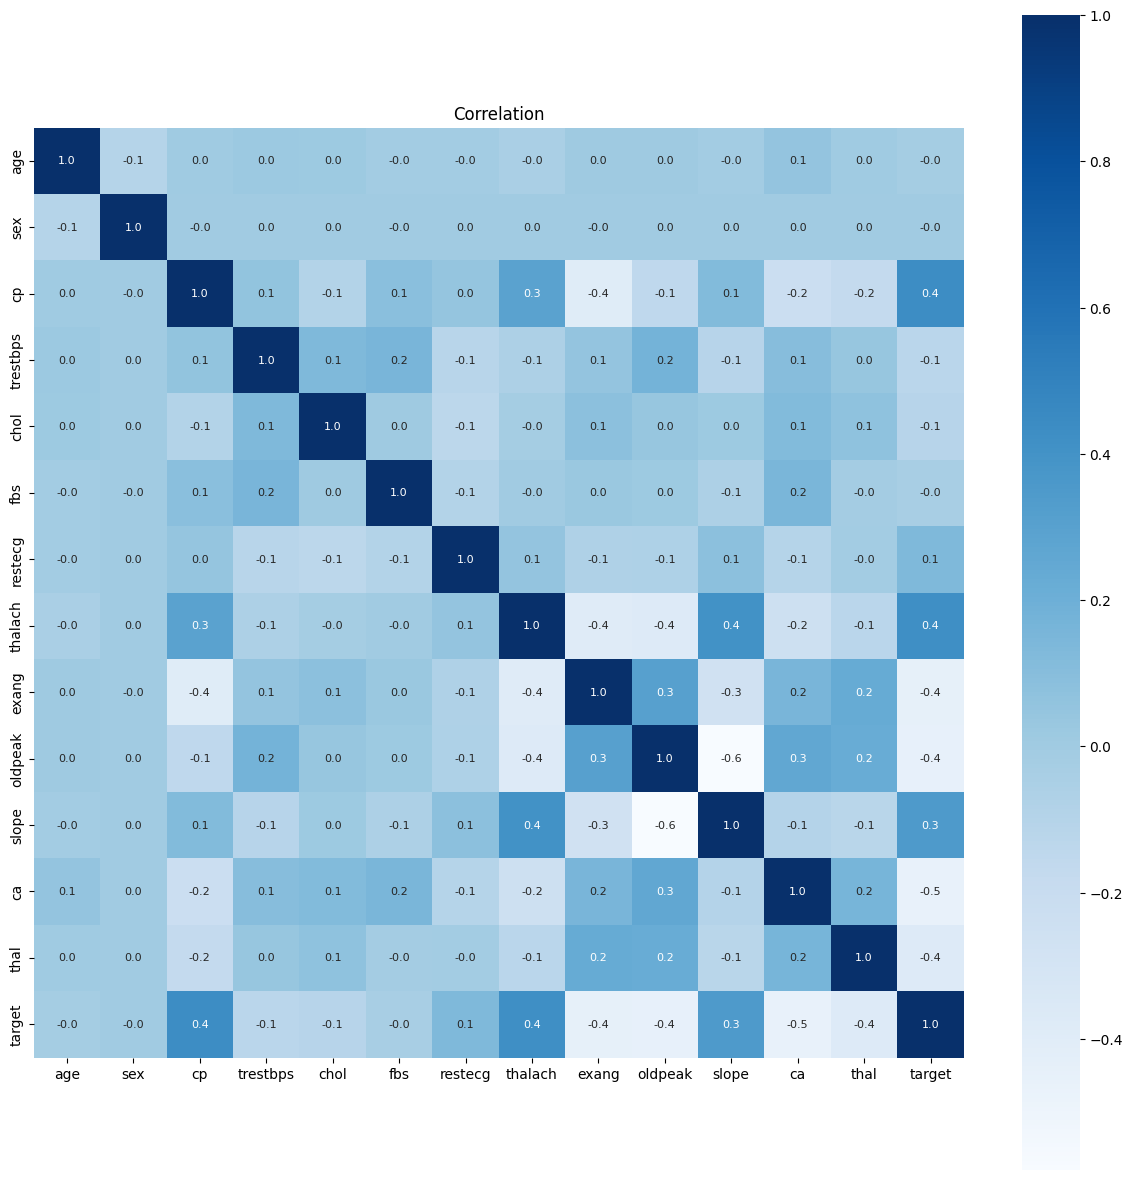

In [20]:
#using heatmap to visualize the correlation
ax =plt.figure(figsize=(15,15))
sns.heatmap(hyper.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title("Correlation")

**MODEL BUILDING**

In [21]:
#Separate the Data and Label
X = hyper.drop(columns = 'target', axis=1)
Y = hyper['target']

In [22]:
print(X)

        age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      57.0  1.0   3       145   233    1        0      150      0      2.3   
1      64.0  0.0   2       130   250    0        1      182      0      3.4   
2      52.0  1.0   1       130   204    0        0      172      0      1.4   
3      56.0  0.0   1       120   236    0        1      178      0      0.8   
4      66.0  0.0   0       120   330    0        1      163      1      0.6   
...     ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
26078  72.0  0.0   0       138   294    1        1      108      0      1.9   
26079  60.0  1.0   0       144   200    0        0      126      1      0.9   
26080  68.0  1.0   0       108   234    0        1      156      0      0.1   
26081  67.0  1.0   1       154   232    0        0      164      0      0.0   
26082  67.0  0.0   1       130   236    0        0      174      0      0.0   

       slope  ca  thal  
0          0   0     1  
1

In [23]:
print(Y)

0        1
1        1
2        1
3        1
4        1
        ..
26078    0
26079    0
26080    0
26081    0
26082    0
Name: target, Length: 26083, dtype: int64


**Model Building**

In [30]:
#splitting the dataset into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [31]:
#printing the shape of test and training set
print(X.shape, X_train.shape, X_test.shape)

(26083, 13) (20866, 13) (5217, 13)


**Model Training**

In [32]:
#importing classifier library
classifier = svm.SVC(kernel='linear')

In [33]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**Model Evaluation**

In [34]:
#Evaluate the model using the training dataset
X_train_predict=classifier.predict(X_train)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train, X_train_predict))
print("Precision on training data:", metrics.precision_score(Y_train, X_train_predict))
print("Recall on training data:", metrics.recall_score(Y_train, X_train_predict))

Accuracy on training data:  0.838205693472635
Precision on training data: 0.8159817710379508
Recall on training data: 0.9094491636745775


In [35]:
#Evaluate using the testing dataset
X_test_predict=classifier.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, X_test_predict))
print("Precision on testing data:", metrics.precision_score(Y_test, X_test_predict))
print("Recall on testing data: ", metrics.recall_score(Y_test, X_test_predict))


Accuracy on testing data:  0.8376461567950929
Precision on testing data: 0.8151286880100439
Recall on testing data:  0.9096322241681261


TN=1773, FP=589, FN=258, TP=2597


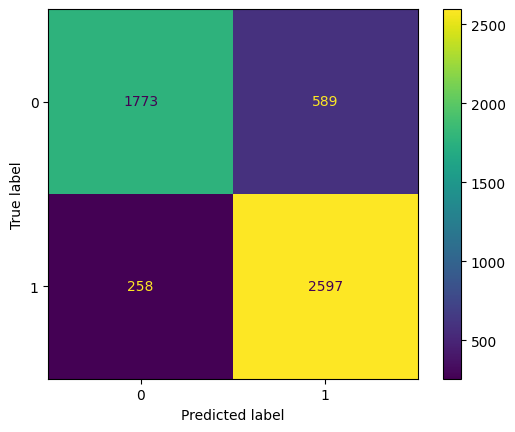

In [36]:
#Display the confusion matrix
cmet = metrics.confusion_matrix(Y_test, X_test_predict)
TN, FP, FN, TP = cmet.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmet)
disp.plot()
plt.show()

In [37]:
#Calculate the accuracy, precision and recall from the confusion matrix
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)

Calculated accuracy =  0.8376461567950929
Calculated precision =  0.8151286880100439
Calculated recall =  0.9096322241681261


the testing data and the calculated result are the same

**Investigating Bias**

*Group Unaware*

In [38]:
#Drop the Sex parameter from X_train and X_test
X_train_bias = X_train.drop(columns=['sex'])
X_test_bias = X_test.drop(columns=['sex'])

In [39]:
#Train a new SVM model:
model_gb = svm.SVC(kernel='linear')
model_gb.fit(X_train_bias,Y_train)

SVC(kernel='linear')

In [40]:
#Training data:
train_predict_gb=model_gb.predict(X_train_bias)
print("Accuracy on train data: ", metrics.accuracy_score(Y_train, train_predict_gb))
print("Precision using train data:", metrics.precision_score(Y_train, train_predict_gb))
print("Recall using train data:", metrics.recall_score(Y_train, train_predict_gb))


Accuracy on train data:  0.838205693472635
Precision using train data: 0.8159817710379508
Recall using train data: 0.9094491636745775


In [41]:
#Test data:
test_predict_gb=model_gb.predict(X_test_bias)
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, test_predict_gb))
print("Precision using test data:", metrics.precision_score(Y_test, test_predict_gb))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_predict_gb))


Accuracy on test data:  0.8376461567950929
Precision using test data: 0.8151286880100439
Recall on testing data:  0.9096322241681261


Compare the results (accuracy, precision and recall) for the two outcomes: Using sex as a parameter in the SVM model Gender Blind SVM model

**Splitting the True and Predicted Values into Male and Female Groups**

Get the indices for “Male” and “Female” from the test data



In [42]:
#The code below will check the Gender parameter [Protected Characteristics] 
#and extract the indices where the values are 1.0 [Male] and 0.0 [Female]
PROTECTED  =  "sex" 
Male =  1.0 #men 
Female = 0.0 #women
male_indices = np.where(X_test[PROTECTED] == Male)[0]
female_indices = np.where(X_test[PROTECTED] == Female)[0]
print(male_indices, "No of Male =", male_indices.size)
print(female_indices, "No of Female =", female_indices.size)


[   0    1    2 ... 5208 5209 5212] No of Male = 2614
[   3    7   13 ... 5214 5215 5216] No of Female = 2598


**Extract the actual outcomes for the two groups**

In [43]:
# We will use the indices to split Y_test into two groups (one for Male and one for Female)
Y_test_m = [Y_test.values[i] for i in male_indices]
Y_test_f = [Y_test.values[i] for i in female_indices]
print(Y_test_m)
print(Y_test_f)

[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 

**Extract the predicted outcomes for the two groups**



In [44]:
#Use the indices to split the predicted values (test_predict) into two groups 
#(test_predict_m for Male and test_predict_f for Female) using the approach above
test_predict_m = [test_predict_gb[i] for i in male_indices]
test_predict_f = [test_predict_gb[i] for i in female_indices]
print(test_predict_m)
print(test_predict_f)

[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 

**Generate a confusion matrix for the two groups**



TN=892, FP=289, FN=121, TP=1312


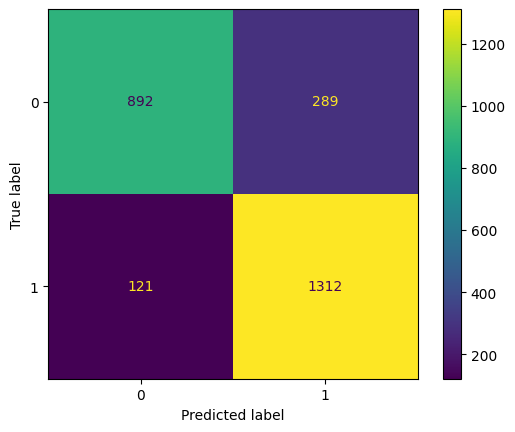

In [45]:
#Compute the confusion matrices (cmet_m and cmet_f) for the two groups
cmet_m = metrics.confusion_matrix(Y_test_m, test_predict_m)
TN_m, FP_m, FN_m, TP_m = cmet_m.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_m, FP_m, FN_m, TP_m))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmet_m)
disp.plot()
plt.show()


TN=881, FP=295, FN=137, TP=1285


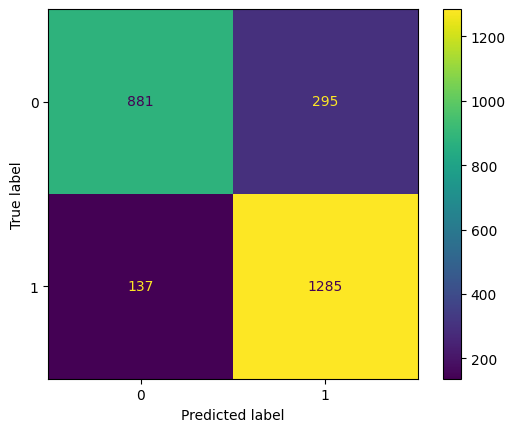

In [46]:
cmet_f = metrics.confusion_matrix(Y_test_f, test_predict_f)
TN_f, FP_f, FN_f, TP_f = cmet_f.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_f, FP_f, FN_f, TP_f))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmet_f)
disp.plot()
plt.show()


***Compute the following performance metrics for the two confusion matrices: Accuracy, Positive rate and Recall***

In [47]:
#metrics for male on test data
print("Accuracy on test data: ", metrics.accuracy_score(Y_test_m, test_predict_m))
print("Precision using test data:", metrics.precision_score(Y_test_m, test_predict_m))
print("Recall on testing data: ", metrics.recall_score(Y_test_m, test_predict_m))

Accuracy on test data:  0.8431522570772763
Precision using test data: 0.8194878201124297
Recall on testing data:  0.9155617585484996


In [48]:
#metrics for female on test data
print("Accuracy on test data: ", metrics.accuracy_score(Y_test_f, test_predict_f))
print("Precision using test data:", metrics.precision_score(Y_test_f, test_predict_f))
print("Recall on testing data: ", metrics.recall_score(Y_test_f, test_predict_f))

Accuracy on test data:  0.8337182448036952
Precision using test data: 0.8132911392405063
Recall on testing data:  0.9036568213783404


In [49]:
print(metrics.classification_report(Y_test_m, test_predict_m))
#print("Positive Rate", (TP_m+FP_m)/(TP_m+FP_m+TN_m+FN_m))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1181
           1       0.82      0.92      0.86      1433

    accuracy                           0.84      2614
   macro avg       0.85      0.84      0.84      2614
weighted avg       0.85      0.84      0.84      2614



In [50]:
print(metrics.classification_report(Y_test_f, test_predict_f))
#print("Positive Rate", (TP_f+FP_f)/(TP_f+FP_f+TN_f+FN_f))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1176
           1       0.81      0.90      0.86      1422

    accuracy                           0.83      2598
   macro avg       0.84      0.83      0.83      2598
weighted avg       0.84      0.83      0.83      2598



**Equal Accuracy**

In [51]:
#accuracy (% of correct classification) = TP+TN/TP+TN+FP+FN

accuracy_f = (TP_f + TN_f) / (TP_f + TN_f + FP_f + FN_f)
print ('accuracy for female is', accuracy_f)

accuracy_m = (TP_m + TN_m) / (TP_m + TN_m + FP_m + FN_m)
print ('accuracy for male is', accuracy_m)

accuracy for female is 0.8337182448036952
accuracy for male is 0.8431522570772763


***Equal Opportunity Rate***

In [52]:
# equal opportunity rate (sensitivity/recall) = TP/TP+FN

equal_opportunity_rate_f = (TP_f) / (TP_f + FN_f)
print ('equal opprtunity rate for female is', equal_opportunity_rate_f)

equal_opportunity_rate_m = (TP_m) / (TP_m + FN_m)
print ('equal opprtunity rate for male is', equal_opportunity_rate_m)


equal opprtunity rate for female is 0.9036568213783404
equal opprtunity rate for male is 0.9155617585484996


**Demographic or Statistical Parity**

In [54]:
#equal positive rate = TP+FP/TP+TN+FP+FN
demo_f = (TP_f + FP_f) / (TP_f+TN_f+ FP_f + FN_f)
print ('demographic for female is', demo_f)

demo_m = (TP_m + FP_m) / (TP_m+TN_m+ FP_m + FN_m)
print ('demographic for male is', demo_m)

demographic for female is 0.6081601231716706
demographic for male is 0.6124713083397093
